# Breast Cancer prediction using Machine Learning algorithms-UDAY KUMAR

In [1]:
#important libraries 
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
#reading data fron file
df=pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#return the size of the dataset
df.shape



(569, 33)

In [5]:
#return all the null values with count
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#there we remove the null value cloumn
df=df.dropna(axis=1)

In [7]:
#shape of the dataset after removing the columns 
df.shape


(569, 32)

In [8]:
#describe the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
#get the count of benign(b)malignant (m) cells
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

C:\Users\madup\AppData\Local\Temp\ipykernel_10980\3722891894.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='diagnosis', palette=["blue", "orange"])


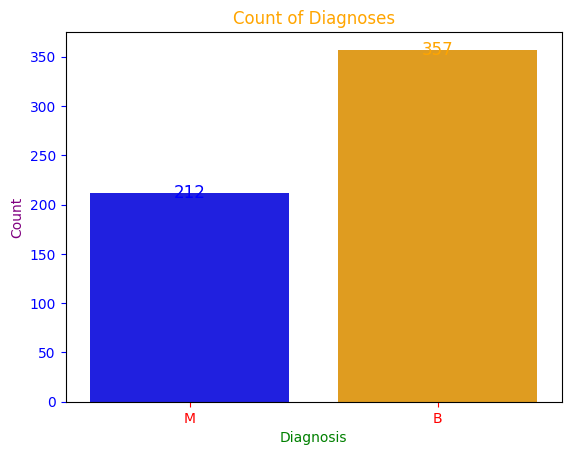

In [10]:
ax = sns.countplot(data=df, x='diagnosis', palette=["blue", "orange"])
for p in ax.patches:
    count = int(p.get_height())
    if p.get_x() < 0.5: 
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='center', color='blue', fontsize=12)
    else:  
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='center', color='orange', fontsize=12)


plt.gca().tick_params(axis='x', colors='red') 
plt.gca().tick_params(axis='y', colors='blue') 


plt.xlabel("Diagnosis", color='green')  # Change x-axis label color to green
plt.ylabel("Count", color='purple')  # Change y-axis label color to purple
plt.title("Count of Diagnoses", color='orange')  # Change title color to orange

# Show the plot
plt.show()

In [11]:
#Lable encoding (converting the value of m and B into 1 and 0)
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
df.iloc[:,1]=labelencoder_y.fit_transform(df.iloc[:,1].values)

In [12]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


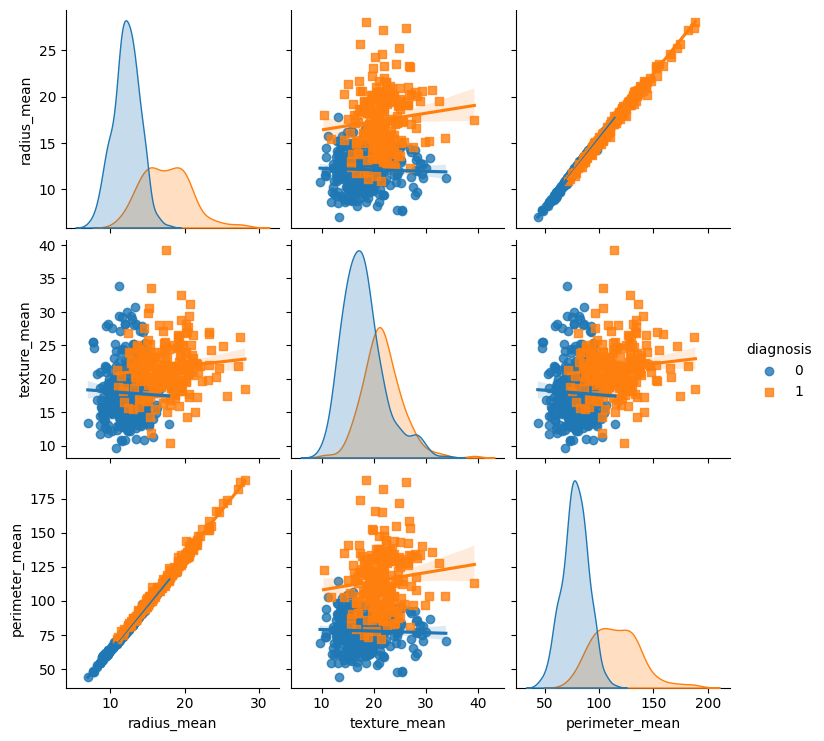

In [13]:
#this will give pairwise plots of the frist four features 
sns.pairplot(df.iloc[:, 1:5], hue="diagnosis", kind="reg", markers=["o", "s"])


In [14]:
#finding correlation
df.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


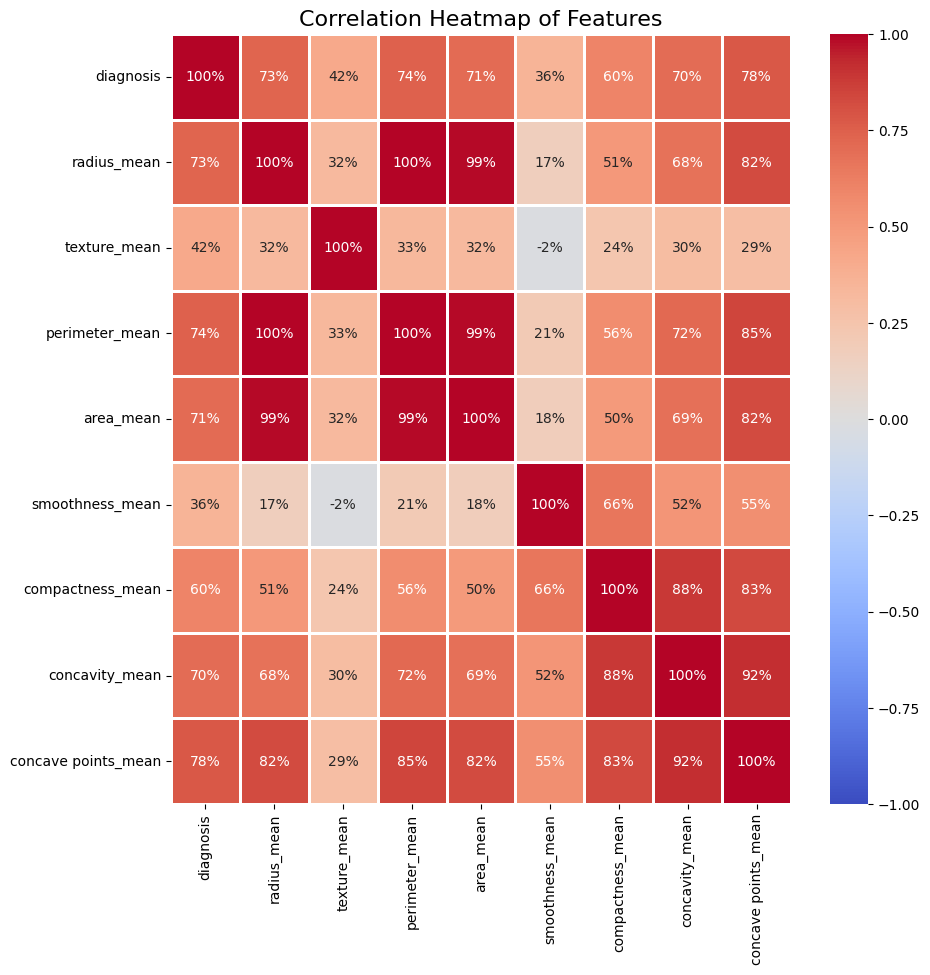

In [15]:
#visualize the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(df.iloc[:, 1:10].corr(), annot=True, fmt=".0%", cmap="coolwarm", center=0, linewidths=1, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features", fontsize=16)
# Display the heatmap
plt.show()

In [16]:
#spliting the dataset into dependent and Independent dataset
X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values  

In [17]:
print(X)

[[ 17.99    10.38   122.8    ...   0.7119   0.2654   0.4601]
 [ 20.57    17.77   132.9    ...   0.2416   0.186    0.275 ]
 [ 19.69    21.25   130.     ...   0.4504   0.243    0.3613]
 ...
 [ 16.6     28.08   108.3    ...   0.3403   0.1418   0.2218]
 [ 20.6     29.33   140.1    ...   0.9387   0.265    0.4087]
 [  7.76    24.54    47.92   ...   0.       0.       0.2871]]


In [18]:
#train test split (spliting the 80 20 for training and test dataset)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)


In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [20]:
def models(X_train, Y_train):
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.preprocessing import LabelEncoder

    # Ensure target labels are categorical
    if not isinstance(Y_train[0], (int, str)):  # If labels are not integers or strings
        label_encoder = LabelEncoder()
        Y_train = label_encoder.fit_transform(Y_train)
    
    # Logistic Regression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    # Decision Tree
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, Y_train)
    
    # Random Forest
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, Y_train)
    
    # Print model accuracies
    print('[0] Logistic Regression accuracy:', log.score(X_train, Y_train))
    print('[1] Decision Tree accuracy:', tree.score(X_train, Y_train))
    print('[2] Random Forest accuracy:', forest.score(X_train, Y_train))
    
    return log, tree, forest


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Example dataset
data = load_iris()
X = data.data  
Y = data.target 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

log, tree, forest = models(X_train, Y_train)



[0] Logistic Regression accuracy: 0.9666666666666667
[1] Decision Tree accuracy: 1.0
[2] Random Forest accuracy: 0.9833333333333333


In [22]:
from sklearn.preprocessing import StandardScaler

# Example: Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data
X_test = scaler.transform(X_test)        # Transform test data with the same scaler


In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification  # Generate complex dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Generate a more complex dataset
X, Y = make_classification(
    n_samples=1000,  # Larger dataset
    n_features=20,   # More features for complexity
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    random_state=0
)

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
def models(X_train, Y_train):
    model_list = [
        LogisticRegression(random_state=0, max_iter=200),
        DecisionTreeClassifier(random_state=0),
        RandomForestClassifier(random_state=0, n_estimators=100)
    ]
    for model in model_list:
        model.fit(X_train, Y_train)
    return model_list

# Train models
model = models(X_train, Y_train)

# Evaluate models
for i in range(len(model)):
    print(f"Model {i}:")
    predictions = model[i].predict(X_test)
    print(classification_report(Y_test, predictions, target_names=["Class 0", "Class 1"]))
    print('Accuracy:', accuracy_score(Y_test, predictions))
    print("-" * 40)


Model 0:
              precision    recall  f1-score   support

     Class 0       0.70      0.72      0.71       103
     Class 1       0.69      0.67      0.68        97

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200

Accuracy: 0.695
----------------------------------------
Model 1:
              precision    recall  f1-score   support

     Class 0       0.78      0.76      0.77       103
     Class 1       0.75      0.77      0.76        97

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200

Accuracy: 0.765
----------------------------------------
Model 2:
              precision    recall  f1-score   support

     Class 0       0.89      0.88      0.89       103
     Class 1       0.88      0.89      0.88        97

    accuracy                           0.

In [24]:
# prediction of decision tree-forest
pred=model[2].predict(X_test)
print('Predicted values:')
print(pred)
print('Actual values:')
print(Y_test)

Predicted values:
[0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1
 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1
 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0
 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1]
Actual values:
[0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1
 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0]


In [26]:
from joblib import dump
dump(model[2], "cancer_prediction_model.job")



['cancer_prediction_model.job']